# Exam_1  Assignment

## Anna Tigranyan

**The overview**<br>

An online sales company wants to predict if the user will come back to its website after 10 days based on the actions done within the first 3 days after registration. The model will be used in several marketing campaigns.
<br>
The dataset - **train.csv**<br>
The test dataset - will not be available till the end of the exam - test.csv
<br>
Description:<br>
Each row represents a user who registered and did some actions.
<br>
Target: <br>
**came_back:** 0 - user didn’t come back after 10 days, 1 - came back.
<br>
Features:<br>
**n_visits** - number of visits of the website during the first 3 days.<br>
**n_actions** - number of actions/button clicks in the website during the first 3 days.<br>
**unique_actions** - number of unique actions in the website during the first 3 days.<br>
**products_tried** - number of products viewed during the first 3 days.<br>
**products_added** - number of products added to cart during the first 3 days.<br>
**unique_products_category_tried** - number of unique products’ categories viewed during the first 3 days.<br>
**Unique_products**_category_added - number of unique products’ categories added to cart during the first 3 days.<br>
**saved_to_cart** - if the user actually saved the purchases for later purchase during the first 3 days.<br>
**comments_writen** - how many unique comments the user did during the first 3 days.<br>
**counts_of_buys** - how many times the user actually paid during the first 3 days.<br>
<br>
Allowed Models:<br>
●	**KNN**<br>
●	**Decision Trees**<br>
●	**Regressions**<br>
●	**Bayesyan inference**<br>
<br>
Grading:<br>
Grading is based on the performance of the model on the test dataset. Keep in mind there could be a 1- 4% accuracy fluctuations. The student provides the whole notebook with the final model, feature engineering and scaling, otherwise the results might differ from the original one.<br>
The student receives the maximum grade if the accuracy metrics score is higher than 75%. If the score is between 60% and 75% then the student gets half of the grade, otherwise zero.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'train.csv')

In [3]:
df.head()

,Unnamed: 0,n_visits,n_actions,unique_actions,products_tried,products_added,unique_products_category_tried,unique_products_category_added,saved_to_cart,comments_writen,counts_of_buys,came_back
0,255863,1,63,45,0,0,0,2,1,1,2,0
1,583906,4,350,72,0,0,0,2,1,4,6,0
2,280626,12,1019,123,5,2,6,6,1,9,14,0
3,357109,1,503,124,0,0,30,16,0,0,0,0
4,264311,15,1869,139,0,0,34,13,1,12,25,1


**'Unnamed: 0'** is unusefull column: let's drop it.

In [4]:
df = df.drop(['Unnamed: 0'],axis=1)

### Checking **duplicats**

In [5]:
df.shape

(658052, 11)

In [6]:

print(f'Number of duplicates: {df.duplicated().sum()}')

Number of duplicates: 114169


In [7]:
df = df.drop_duplicates()

In [8]:
df.shape

(543883, 11)

We don't have duplicated rows in our dataset anymore

### Checking **missing values**

In [9]:
pd.isna(df).sum()

n_visits                          0
n_actions                         0
unique_actions                    0
products_tried                    0
products_added                    0
unique_products_category_tried    0
unique_products_category_added    0
saved_to_cart                     0
comments_writen                   0
counts_of_buys                    0
came_back                         0
dtype: int64

We have **no missing values** in our dataset.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543883 entries, 0 to 658051
Data columns (total 11 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   n_visits                        543883 non-null  int64
 1   n_actions                       543883 non-null  int64
 2   unique_actions                  543883 non-null  int64
 3   products_tried                  543883 non-null  int64
 4   products_added                  543883 non-null  int64
 5   unique_products_category_tried  543883 non-null  int64
 6   unique_products_category_added  543883 non-null  int64
 7   saved_to_cart                   543883 non-null  int64
 8   comments_writen                 543883 non-null  int64
 9   counts_of_buys                  543883 non-null  int64
 10  came_back                       543883 non-null  int64
dtypes: int64(11)
memory usage: 49.8 MB


Our **saved_to_cart** and **came_back** variables are categorical.Let's change dtypes.

In [11]:
df = df.astype({"saved_to_cart":'category',"came_back":'category'})

## Train test split

In [12]:
train = df.sample(frac=0.9,random_state=42) # train data
test = df.drop(train.index) # test data

In [13]:
X_test = test.drop(['came_back'], axis=1)
y_test = test['came_back']

<AxesSubplot:xlabel='came_back', ylabel='count'>

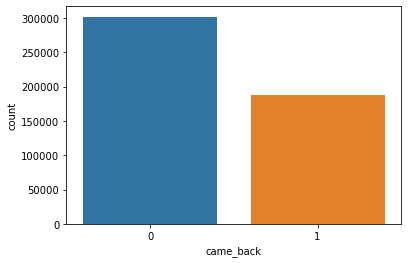

In [14]:
sns.countplot(train['came_back'])

In [15]:
from collections import Counter
print(f"Training target statistics: {Counter(train['came_back'])}")

Training target statistics: Counter({0: 301609, 1: 187886})


From above countplot we can see that our test data is **unbalanced**.

## Training Data balancing

In [16]:
class_count_0,class_count_1 = train["came_back"].value_counts()

class_0 = train[train["came_back"] == 0]
class_1 = train[train["came_back"] == 1]

class_0_under = class_0.sample(class_count_1)
train = pd.concat([class_0_under,class_1],axis=0)

<AxesSubplot:xlabel='came_back', ylabel='count'>

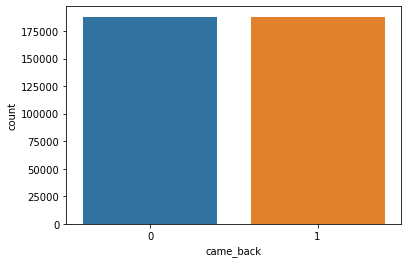

In [17]:
sns.countplot(train['came_back'])

Now our train data **is balanced** 

In [18]:
X_train = train.drop(['came_back'], axis=1) 
y_train = train['came_back']

## Scaling 

In [19]:
from sklearn.preprocessing import StandardScaler

scaler_sd = StandardScaler()

# Get scaling parameters with the X_train sample exclusively, using the Scaler.fit() function
scaler_sd.fit(X_train)

# Scale data using Scaler.transform()
X_train_scaled_sd = scaler_sd.transform(X_train)
X_test_scaled_sd = scaler_sd.transform(X_test)

In [20]:
# from sklearn.decomposition import PCA
# pca = PCA()

# pca.fit(X_train_scaled_sd)

# X_train_scaled_sd = pca.transform(X_train_scaled_sd)
# X_test_scaled_sd = pca.transform(X_test_scaled_sd)

GridSearchCV for Decision Tree's **'max_depth'**

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [22]:
max_depth = [4,5,6,7,8,9,10,11,12,13,14,15]
param_grid = {'max_depth': max_depth}

dt = DecisionTreeClassifier() 

full_cv_classifier = GridSearchCV(dt,param_grid,cv=5,scoring='accuracy')

full_cv_classifier.fit(X_train_scaled_sd,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15]},
             scoring='accuracy')

In [23]:
full_cv_classifier.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Optimal  'max_depth':  **7**

In [24]:
dt = DecisionTreeClassifier(max_depth=7)
dt.fit(X_train_scaled_sd,y_train)

DecisionTreeClassifier(max_depth=7)

In [25]:
pred = dt.predict(X_test_scaled_sd)

In [26]:
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report

In [27]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79     33594
           1       0.65      0.75      0.70     20794

    accuracy                           0.75     54388
   macro avg       0.74      0.75      0.74     54388
weighted avg       0.76      0.75      0.75     54388



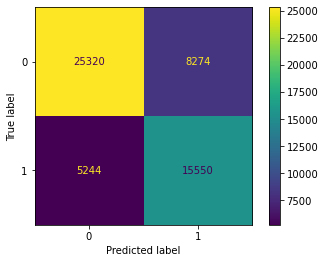

In [28]:
print(plot_confusion_matrix(dt,X_test_scaled_sd,y_test))

We can se that our model provides **75% accuracy**